In [22]:
import numpy as np
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Flatten
from keras.datasets import mnist

In [3]:
# normalising the dimensions of the images to increase the performance of cnn
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 70s 6us/step


In [4]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

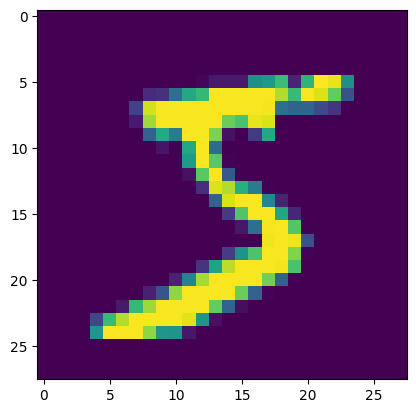

In [8]:
plt.imshow(train_images[0]);

In [9]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
import numpy as np
num_samples = 12
random_indices = np.random.choice(train_images.shape[0], num_samples, replace=False)
sample_images = train_images[random_indices]
sample_labels = train_labels[random_indices]

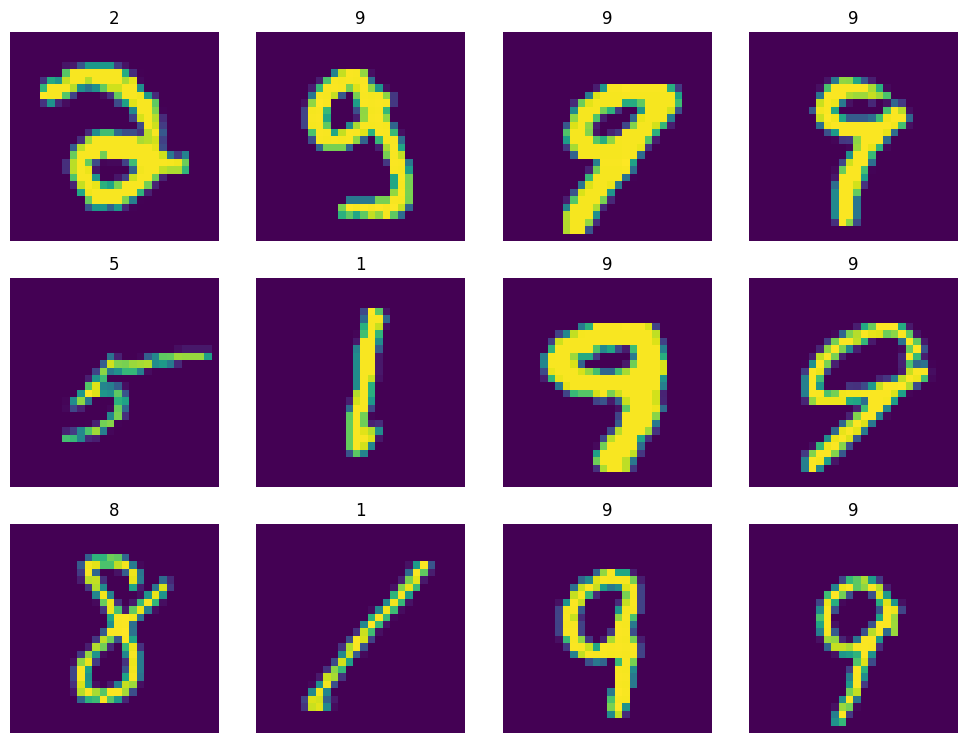

In [18]:
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(4, 4, i + 1)
    plt.imshow(sample_images[i])
    # plt.title(i)


    plt.title(int(sample_labels[i]))  # Ensure sample_labels[i][0] is an index within the range of labels
    plt.axis('off')
plt.tight_layout()
plt.show()

In [21]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/Users/priyanshu/Documents/MLDump/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-09-21 19:32:55.577080: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-09-21 19:32:55.577208: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-09-21 19:32:55.577224: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-09-21 19:32:55.577856: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-21 19:32:55.578491: I tensorflow/core/common_runtime/pluggable_device/pluggable_devic

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,378 (274.91 KB)

 Trainable params: 70,378 (274.91 KB)

 Non-trainable params: 0 (0.00 B)

None


In [26]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/20


2024-09-21 19:33:19.005760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.8607 - loss: 0.4765 - val_accuracy: 0.9826 - val_loss: 0.0567
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9798 - loss: 0.0679 - val_accuracy: 0.9863 - val_loss: 0.0463
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9858 - loss: 0.0458 - val_accuracy: 0.9889 - val_loss: 0.0374
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9902 - loss: 0.0316 - val_accuracy: 0.9894 - val_loss: 0.0336
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9914 - loss: 0.0276 - val_accuracy: 0.9892 - val_loss: 0.0321
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9935 - loss: 0.0212 - val_accuracy: 0.9901 - val_loss: 0.0315
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9948 - loss: 0.0172 - val_accuracy: 0.9891 - val_loss: 0.0356
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9945 - loss: 0.0163 - val_accurac

In [27]:
loss,accuracy = model.evaluate(train_images,train_labels)
print(f"The model accuracy is : {accuracy} \n the model loss : {loss}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9996 - loss: 0.0012
The model accuracy is : 0.9995666742324829 
 the model loss : 0.0012563111959025264


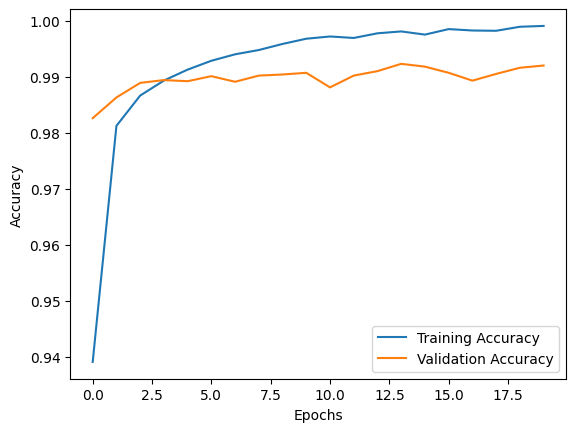

In [28]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.show()

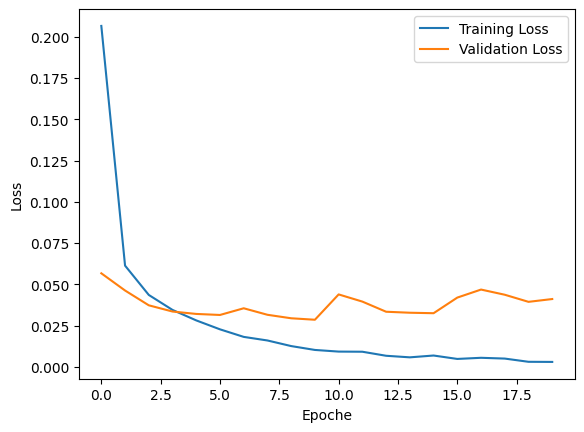

In [29]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epoche")
plt.ylabel("Loss")
plt.legend()
plt.show()